<a href="https://colab.research.google.com/github/rxgvnd/Machine-Learning/blob/master/W10_IraSuryani_31410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ira Suryani Anggraini - 00000031410
#Density Algorithm : DBSCAN
!pip install opencv-python


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN

In [ ]:
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1,3),
               x_off=(0,50), y_off=(0,50)):
    
    #n_clusters = number of clusters to generate
    #pts_minmax = range of number of points per cluster
    #x_mult = range of multiplier to modify the size of cluster in the x-direction
    #y_mult = range of multiplier to modify the size of cluster in the y-direction
    #x_off = range of cluster position offset in the x-direction
    #y_off = range of cluster position offset in the y-direction
    
    #Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    
    #Generate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
    
    #Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
        
    #Return Cluster Positions
    return clusters_x, clusters_y

In [ ]:
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)

In [ ]:
data = np.float32((np.concatenate(clusters_x),
                   np.concatenate(clusters_y))).transpose()

In [ ]:
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)

In [ ]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [ ]:
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

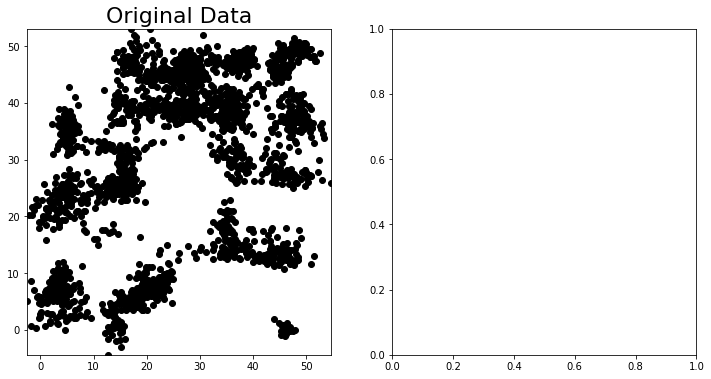

In [ ]:
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(data[:, 0], data[:, 1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 22)

plt.subplot(122)

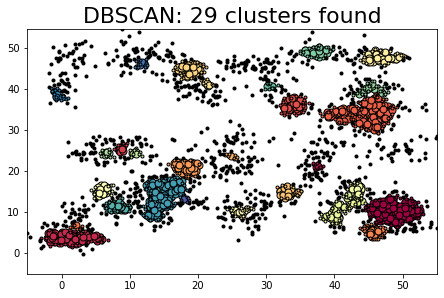

In [ ]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        #Black used for noise
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=7)
    
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
    
plt.xlim(min_x, max_x)
plt.ylim(min_x, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 22)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

In [ ]:
import numpy as np
import pandas as pd

import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df = df.rename(columns={"Genre":"Gender"})

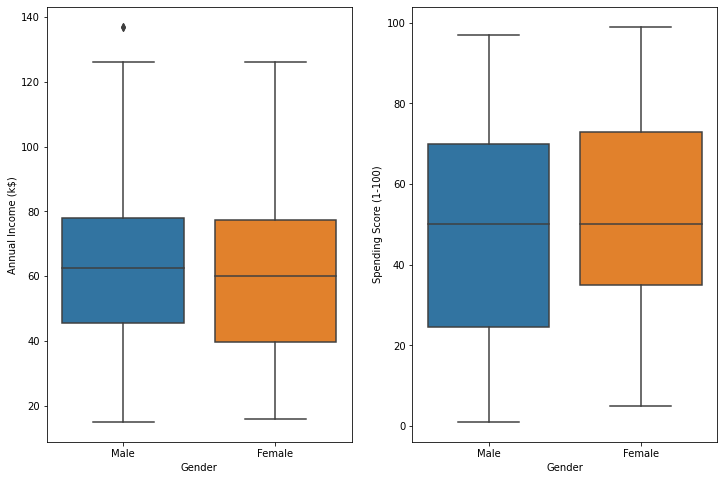

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, orient='v', ax=axes[0])
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, orient='v', ax=axes[1])

In [ ]:
df_group_one = df[['Gender','Annual Income (k$)','Spending Score (1-100)']]
df_group_one.groupby(['Gender'], as_index=False).mean()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


In [ ]:
df_female = df[df['Gender'] == "Female"]
print(df_female.shape)
df_female.head()

(112, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [ ]:
Percentage = (df_female.shape[0]/df.shape[0])*100
print('Female Percentage: ', round(Percentage), '%')

Female Percentage:  56 %


In [ ]:
#Compute DBSCAN
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_female[['Age','Annual Income (k$)','Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

#Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

#A sample of clusters
print(df_female[['Age','Annual Income (k$)','Spending Score (1-100)','Clus_Db']].head())

#Number of labels
print("Number of Labels : ", set(labels))


   Age  Annual Income (k$)  Spending Score (1-100)  Clus_Db
2   20                  16                       6       -1
3   23                  16                      77        0
4   31                  17                      40       -1
5   22                  17                      76        0
6   35                  18                       6       -1
Number of Labels :  {0, 1, 2, 3, -1}


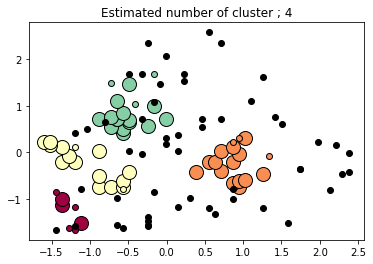

Number of Noise(s):  54


In [ ]:
#Black removed and is used for noise instead
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        #Black used for noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    
    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
    
    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of cluster ; %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('Number of Noise(s): ', n_noise_)

In [ ]:
for clust_number in set(labels):
    clust_set = df_female[df_female.Clus_Db == clust_number]
    if clust_number != -1:
        print ("Cluster "+str(clust_number)+', Avg Age: '+str(round(np.mean(clust_set.Age)))+\
               ', Avg Income: '+str(round(np.mean(clust_set['Annual Income (k$)'])))+\
               ', Avg Spending: '+str(round(np.mean(clust_set['Spending Score (1-100)'])))+\
               ', Count: '+str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 22, Avg Income: 26, Avg Spending: 78, Count: 7
Cluster 1, Avg Age: 49, Avg Income: 54, Avg Spending: 50, Count: 17
Cluster 2, Avg Age: 25, Avg Income: 52, Avg Spending: 50, Count: 16
Cluster 3, Avg Age: 32, Avg Income: 82, Avg Spending: 82, Count: 18


In [ ]:
#Association Learning - Aprioti Algorithm
!pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs','Yogurt'],
          ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs','Yogurt'],
          ['Milk', 'Apple', 'Kidney Beans','Eggs'],
          ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
          ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice Cream','Eggs']]

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice Cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support = 0.6)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


In [ ]:
apriori(df, min_support = 0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                 (frequent_itemsets['support'] >= 0.8)]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


In [ ]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'}]

,support,itemsets,length
6,0.6,"(Eggs, Onion)",2


In [ ]:
#Association Learning - FP Growth Algorithm
import mlxtend
print(mlxtend.__version__)

0.18.0


In [ ]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.6)

,support,itemsets
0,1.0,(5)
1,0.8,(3)
2,0.6,(10)
3,0.6,(8)
4,0.6,(6)
5,0.8,"(3, 5)"
6,0.6,"(10, 5)"
7,0.6,"(8, 3)"
8,0.6,"(8, 5)"
9,0.6,"(8, 3, 5)"


In [ ]:
fpgrowth(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Eggs, Onion)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Eggs, Onion, Kidney Beans)"


In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice Cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(df, min_support=0.6)

100 loops, best of 10: 4.68 ms per loop


In [ ]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.6)

100 loops, best of 10: 1.7 ms per loop
